In [39]:
import gzip
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from collections import Counter
import seaborn as sns 
from matplotlib.ticker import StrMethodFormatter

#data = pd.read_csv('listings.csv.gz', nrows=1000, compression='gzip', error_bad_lines=False)
#data.head()

data_complete = pd.read_csv('SF_listings.csv', nrows=1000, error_bad_lines=False)

data_complete.fillna(0, inplace=True)

price = data_complete['price']
prices=[]

for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

data_complete['price']=prices

In [40]:


data_complete = pd.DataFrame(data_complete)
data_complete

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20181206023014,2018-12-06,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1.51
1,5858,https://www.airbnb.com/rooms/5858,20181206023014,2018-12-06,Creative Sanctuary,0,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,0.96
2,7918,https://www.airbnb.com/rooms/7918,20181206023014,2018-12-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
3,8142,https://www.airbnb.com/rooms/8142,20181206023014,2018-12-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,0,...,t,0,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,9,0.15
4,8339,https://www.airbnb.com/rooms/8339,20181206023014,2018-12-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,0,...,t,STR-0000264,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,t,t,2,0.24
5,8567,https://www.airbnb.com/rooms/8567,20181206023014,2018-12-06,Lovely 2BR flat Great Location,0,"Fully furnished 2BR, 1BA flat in beautiful Vic...","Fully furnished 2BR, 1BA flat in beautiful Vic...",none,"The neighborhood is very centrally located, cl...",...,t,STR-0000278,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,0.27
6,8739,https://www.airbnb.com/rooms/8739,20181206023014,2018-12-06,"Mission Sunshine, with Private Bath","Welcome to San Francisco's Mission District, t...","Your sunny room has a queen size bed, and look...","Welcome to San Francisco's Mission District, t...",none,Located between Valencia Street and Dolores Pa...,...,t,STR-0000028,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,2,5.54
7,9225,https://www.airbnb.com/rooms/9225,20181206023014,2018-12-06,Artful Potrero Separate Floor with Garden,A Unique Guest Suite! A Spacious Art Filled ...,"It is unique, very spacious [800 sq. ft. with...",A Unique Guest Suite! A Spacious Art Filled ...,none,"It is a distinct neighborhood, with easy acces...",...,t,STR-0000179,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,3.91
8,10251,https://www.airbnb.com/rooms/10251,20181206023014,2018-12-06,Victorian Suite in Inner Mission,0,Please read this before you book! Second floor...,Please read this before you book! Second floor...,none,"Neighborhood is safe, sunny, lively and fun. ...",...,t,STR-0001558,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,2.73
9,10578,https://www.airbnb.com/rooms/10578,20181206023014,2018-12-06,Classic Nob Hill Studio - Roof Deck,A cute studio with nice street views and lots ...,"Features: Elevator, Wood floors, TV, DVD Play...",A cute studio with nice street views and lots ...,none,"Very centrally located. Fishermans Wharf, Chi...",...,t,0,"{""SAN FRANCISCO""}",f,f,moderate,f,t,1,0.21


In [41]:
data_complete.loc[data_complete['reviews_per_month'].isnull(),'reviews_per_month']=0
data_complete.loc[data_complete['square_feet'].isnull(),'square_feet']=0
data_complete.loc[data_complete['review_scores_rating'].isnull(),'review_scores_rating']=0
data_complete.loc[data_complete['review_scores_value'].isnull(),'review_scores_value']=0
data_complete.loc[data_complete['neighbourhood'].isnull(),'neighbourhood']='Not Specified'
data_complete.loc[data_complete['bathrooms'].isnull(),'bathrooms']='Not Specified'
data_complete.loc[data_complete['beds'].isnull(),'beds']='Not Specified'

In [42]:
#create a dataframe with desired columns/values

SF_listing_df = data_complete[['id','host_id','host_is_superhost',
                                'neighbourhood','city','state','property_type',
                                'room_type','accommodates','bathrooms','bedrooms','neighbourhood_cleansed',
                                'beds','bed_type','amenities','square_feet','price','host_total_listings_count',
                               'availability_30', 'availability_60','availability_90', 'availability_365',
                               'number_of_reviews', 'review_scores_rating', 'review_scores_value']]
SF_listing_df

,id,host_id,host_is_superhost,neighbourhood,city,state,property_type,room_type,accommodates,bathrooms,...,square_feet,price,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,958,1169,t,Duboce Triangle,San Francisco,CA,Apartment,Entire home/apt,3,1,...,0.0,170.0,1,3,4,5,74,172,97.0,10.0
1,5858,8904,f,Bernal Heights,San Francisco,CA,Apartment,Entire home/apt,5,1,...,0.0,235.0,2,30,60,90,365,112,98.0,9.0
2,7918,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,...,0.0,65.0,10,30,60,90,365,17,85.0,8.0
3,8142,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4,...,0.0,65.0,10,30,60,90,365,8,93.0,9.0
4,8339,24215,f,Alamo Square,San Francisco,CA,House,Entire home/apt,5,1.5,...,0.0,785.0,2,30,60,89,89,27,97.0,9.0
5,8567,25601,f,Western Addition/NOPA,San Francisco,CA,Apartment,Entire home/apt,6,1,...,0.0,255.0,1,0,5,5,20,31,90.0,9.0
6,8739,7149,t,Mission District,San Francisco,CA,Condominium,Private room,3,1,...,0.0,139.0,2,9,28,49,129,631,98.0,9.0
7,9225,29674,f,Potrero Hill,San Francisco,CA,House,Private room,2,1,...,0.0,135.0,1,20,47,67,342,434,94.0,9.0
8,10251,35199,t,Mission District,San Francisco,CA,Apartment,Entire home/apt,6,1,...,0.0,265.0,1,2,21,51,303,307,96.0,9.0
9,10578,37049,f,0,San Francisco,CA,Apartment,Entire home/apt,2,1,...,0.0,120.0,1,30,60,90,365,18,99.0,10.0


In [43]:
#Columns with Null Values 
#new_listing_df.isna().sum()
#data_complete.drop(['id'], axis=1, inplace=True)

In [73]:
#Clean Column Names
SF_listing_df = SF_listing_df.rename(columns={"host_id": "Host ID",
                                             "host_is_superhost": "Host Is Superhost",
                                             "neighbourhood": "Neighbourhood",
                                             "city": "City",
                                              "state": "State",
                                             "property_type": "Property Type",
                                             "room_type": "Room Type",
                                              "accommodates": "Accomodates",
                                              "bathrooms": "Bathrooms",
                                              "bedrooms": "Bedrooms",
                                             "bed_type": "Bed Type",
                                             "amenities": "Amenities",
                                             "square_feet": "Square Feet",
                                             "host_total_listings_count": "Host Total Listings Count",
                                             "availability_30": "Availability 30",
                                             "availability_60": "Availability_60",
                                             "availability_90": "Availability_90",
                                             "availability_365": "availability_365",
                                             "number_of_reviews": "Number of Reviews",
                                             "review_scores_rating": "Review Scores Rating",
                                            "review_scores_value": "Review Scores Value"})

SF_listing_df.head()

,id,Host ID,Host Is Superhost,Neighbourhood,City,State,Property Type,Room Type,Accomodates,Bathrooms,...,Square Feet,price,Host Total Listings Count,Availability 30,Availability_60,Availability_90,availability_365,Number of Reviews,Review Scores Rating,Review Scores Value
0,958,1169,t,Duboce Triangle,San Francisco,CA,Apartment,Entire home/apt,3,1.0,...,0.0,170.0,1,3,4,5,74,172,97.0,10.0
1,5858,8904,f,Bernal Heights,San Francisco,CA,Apartment,Entire home/apt,5,1.0,...,0.0,235.0,2,30,60,90,365,112,98.0,9.0
2,7918,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4.0,...,0.0,65.0,10,30,60,90,365,17,85.0,8.0
3,8142,21994,f,Cole Valley,San Francisco,CA,Apartment,Private room,2,4.0,...,0.0,65.0,10,30,60,90,365,8,93.0,9.0
4,8339,24215,f,Alamo Square,San Francisco,CA,House,Entire home/apt,5,1.5,...,0.0,785.0,2,30,60,89,89,27,97.0,9.0


In [74]:
SF_listing_df.fillna(0, inplace=True)

In [75]:
#total number of neighbourhoods where Airbnb has rental listings
SF_neighbourhood_total = len(SF_listing_df["neighbourhood_cleansed"].unique())
SF_neighbourhood_total

35

In [76]:
#Breakdown by the number of listings per neighbourhood
SF_neighbourhoods = SF_listing_df.loc[:,"neighbourhood_cleansed"].value_counts()
SF_neighbourhoods.head()

Mission                141
Western Addition       105
Castro/Upper Market     78
Haight Ashbury          77
Bernal Heights          76
Name: neighbourhood_cleansed, dtype: int64

In [77]:
SF_neighbourhoods = pd.DataFrame(SF_neighbourhoods)
SF_neighbourhoods.head()

,neighbourhood_cleansed
Mission,141
Western Addition,105
Castro/Upper Market,78
Haight Ashbury,77
Bernal Heights,76


In [78]:
SF_neighbourhoods['neighbourhood_cleansed'].sum()

1000

In [79]:
#SF_neighbourhoods=SF_neighbourhoods.drop("Not Specified")

In [80]:
SF_neighbourhoods = SF_neighbourhoods.rename(columns={'neighbourhood_cleansed': "Number of Listings"})
#SF_neighbourhoods.drop("Not Specified")
#SF_neighbourhoods.drop("Not Specified", inplace=True)
#SF_neighbourhoods.dtypes
SF_neighbourhoods.head()

,Number of Listings
Mission,141
Western Addition,105
Castro/Upper Market,78
Haight Ashbury,77
Bernal Heights,76


In [81]:
#SF_neighbourhoods["Number of Listings"] = SF_neighbourhoods["Number of Listings"].astype(int64)

top_SF_neighbourhoods = SF_neighbourhoods['Number of Listings'][:5]
top_SF_neighbourhoods

Mission                141
Western Addition       105
Castro/Upper Market     78
Haight Ashbury          77
Bernal Heights          76
Name: Number of Listings, dtype: int64

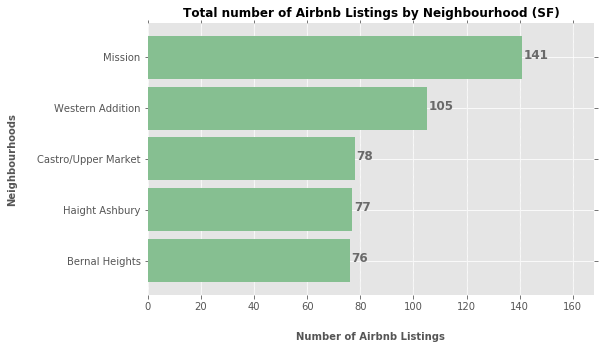

In [82]:
#SF_neighbourhoods.plot.bar()
#ax = top_SF_neighbourhoods.plot.bar(x='Number of Listings',y='Neighbourhoods')


ax = top_SF_neighbourhoods.plot(kind='barh', figsize=(8, 5), color= '#86bf91', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   


ax.set_alpha(0.8)   
ax.set_title("Total number of Airbnb Listings by Neighbourhood (SF)",fontsize=12, fontweight='bold')    
ax.set_xlabel("Number of Airbnb Listings", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Neighbourhoods", labelpad=20, weight='bold', size=10)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.invert_yaxis()


for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.6, i.get_y()+.45, \
            str(i.get_width()), fontsize=12,fontweight='bold',
color='dimgrey')
    
    
    


In [83]:
#Get Top 5 Neighbourhoods
#Group Top 5 Neighbourhoods by Property Type
#Group Top 5 Neighbourhoods by Property Type and Price (Bins) - look at the quantiles (mean, medium) .quantile 


In [84]:
SF_property_type = SF_listing_df["Room Type"].value_counts()
SF_property_type = SF_property_type.reset_index()

SF_property_type = SF_property_type.rename(columns={'index':'Room Type',
                                                   'Room Type': 'Number of Listings'})
SF_property_type

,Room Type,Number of Listings
0,Entire home/apt,639
1,Private room,335
2,Shared room,26


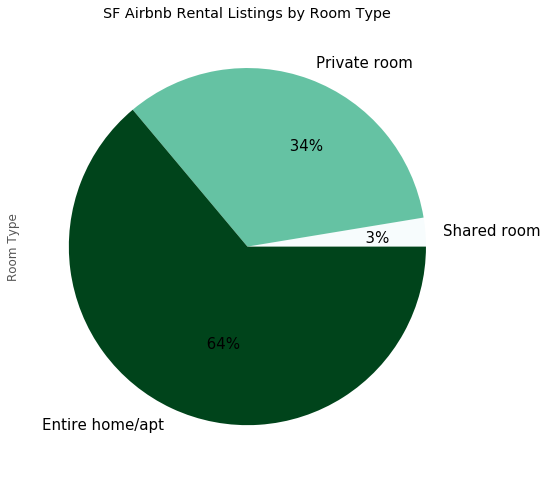

In [85]:
#room type visualizations 

matplotlib.style.use('ggplot')

room = data_complete.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['Room Type']
room_df.plot.pie(y = 'Room Type', 
                 colormap = 'BuGn', 
                 figsize=(8,10), 
                 fontsize = 15, autopct = '%11.f%%',
                 legend = False,
                 title = 'SF Airbnb Rental Listings by Room Type')

#make title bold and bigger than the text labels
#make numbers % format
#Change color of the table to green-ish 
#Add legend


In [86]:
#Breakdown of Room Types

roomProperty_df = SF_listing_df.groupby(['neighbourhood_cleansed','Room Type']).price.mean()
roomProperty_df = roomProperty_df.reset_index()
roomProperty_df = roomProperty_df.sort_values(by='price', ascending=[0])
roomProperty_df = roomProperty_df.rename(columns={"neighbourhood_cleansed": "Neighbourhood",
                                                 "room_type": "Room Type"})
roomProperty_df.head()

,Neighbourhood,Room Type,price
62,South of Market,Shared room,1283.0
54,Presidio Heights,Entire home/apt,593.5
29,Marina,Entire home/apt,435.0
5,Castro/Upper Market,Entire home/apt,342.0
11,Diamond Heights,Entire home/apt,310.0


In [87]:
roomProperty_df = pd.DataFrame(roomProperty_df)
roomProperty_df.head(5)

,Neighbourhood,Room Type,price
62,South of Market,Shared room,1283.0
54,Presidio Heights,Entire home/apt,593.5
29,Marina,Entire home/apt,435.0
5,Castro/Upper Market,Entire home/apt,342.0
11,Diamond Heights,Entire home/apt,310.0


In [88]:
#SF_listing_df

In [89]:
SF_neighbourhood_total = len(SF_listing_df['neighbourhood_cleansed'].unique())
SF_neighbourhood_total

35

In [90]:
SF_neighbourhood_price=SF_listing_df.groupby(['neighbourhood_cleansed']).mean()['price']
SF_neighbourhood_price.sort_values(ascending=False)

neighbourhood_cleansed
Presidio Heights         385.857143
Marina                   370.333333
Diamond Heights          310.000000
South of Market          278.400000
Castro/Upper Market      268.782051
Lakeshore                250.000000
Noe Valley               248.937500
Russian Hill             234.875000
North Beach              228.857143
Pacific Heights          220.700000
Mission                  218.354610
Potrero Hill             216.975000
Western Addition         213.857143
Nob Hill                 205.062500
Glen Park                197.454545
Twin Peaks               188.714286
Haight Ashbury           186.311688
Outer Richmond           179.125000
Outer Sunset             175.941176
Golden Gate Park         175.000000
Bernal Heights           170.210526
Downtown/Civic Center    167.400000
Inner Sunset             162.875000
Inner Richmond           160.774194
Bayview                  146.928571
West of Twin Peaks       145.888889
Parkside                 145.750000
Finan

In [91]:
SF_neighbourhoods_grouped = SF_listing_df.groupby('neighbourhood_cleansed').agg({'price': ['mean', 'min','max']})
SF_neighbourhoods_grouped = SF_neighbourhoods_grouped.reset_index()

SF_neighbourhoods_grouped.head()
# #create a chart summarizing top 5 neighbourhoods of most listings

neighbourhood_cleansed       price              
                                mean   min     max
0                Bayview  146.928571  46.0   999.0
1         Bernal Heights  170.210526  59.0   859.0
2    Castro/Upper Market  268.782051  75.0  1450.0
3              Chinatown   79.133333  30.0   450.0
4         Crocker Amazon   69.250000  55.0    88.0

In [92]:
SF_neighbourhoods_grouped2 = SF_listing_df.groupby(['Neighbourhood','Room Type']).agg({'price': ['mean', 'min','max']})
SF_neighbourhoods_grouped2 = SF_neighbourhoods_grouped2.reset_index()

SF_neighbourhoods_grouped2.head()


Neighbourhood        Room Type       price               
                                        mean    min     max
0             0  Entire home/apt  253.921875   68.0   999.0
1             0     Private room  106.903226   47.0   495.0
2             0      Shared room  311.000000  311.0   311.0
3  Alamo Square  Entire home/apt  331.555556   94.0  1000.0
4  Alamo Square     Private room   82.000000   50.0   129.0

In [93]:
SF_neighbourhoods_grouped2=pd.DataFrame(SF_neighbourhoods_grouped2)
SF_neighbourhoods_grouped2 = SF_neighbourhoods_grouped2.rename(columns={'neighbourhood_cleansed': 'Neighbourhood'})
SF_neighbourhoods_grouped2.head()

Neighbourhood        Room Type       price               
                                        mean    min     max
0             0  Entire home/apt  253.921875   68.0   999.0
1             0     Private room  106.903226   47.0   495.0
2             0      Shared room  311.000000  311.0   311.0
3  Alamo Square  Entire home/apt  331.555556   94.0  1000.0
4  Alamo Square     Private room   82.000000   50.0   129.0

In [94]:
SF_neighbourhoods_grouped2=SF_neighbourhoods_grouped2[(SF_neighbourhoods_grouped2 != 0).all(1)]
SF_neighbourhoods_grouped2.head()


Neighbourhood        Room Type       price               
                                          mean    min     max
3    Alamo Square  Entire home/apt  331.555556   94.0  1000.0
4    Alamo Square     Private room   82.000000   50.0   129.0
5  Balboa Terrace  Entire home/apt  147.500000  110.0   225.0
6  Balboa Terrace     Private room   81.250000   37.0   195.0
7         Bayview  Entire home/apt  127.000000  120.0   131.0

In [95]:
#Popular Neighborhood By Listing Count
SF_mission_neighbourhood = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="Mission"].groupby(['Room Type'])['price'].mean()
SF_mission_neighbourhood

SF_western_neighbourhood = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]== "Western Addition"].groupby(['Room Type'])['price'].mean()
SF_western_neighbourhood

SF_castro_neighbourhood = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]== "Castro/Upper Market"].groupby(['Room Type'])['price'].mean()
SF_castro_neighbourhood

SF_haight_neighbourhood = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]== "Haight Ashbury"].groupby(['Room Type'])['price'].mean()
SF_haight_neighbourhood

SF_bernal_neighbourhood  = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]== "Bernal Heights"].groupby(['Room Type'])['price'].mean()
SF_bernal_neighbourhood

Room Type
Entire home/apt    210.918367
Private room        97.000000
Shared room         79.000000
Name: price, dtype: float64

In [96]:
# SF_top_neighbourhood_by_listings = pd.DataFrame({"Mission": SF_mission_neighbourhood,
#                                                 "Western Addition": SF_western_neighbourhood,
#                                                 "Castro/Upper Market": SF_castro_neighbourhood,
#                                                 "Haight Ashbury": SF_haight_neighbourhood,
#                                                 "Bernal Heights": SF_bernal_neighbourhood})
# SF_top_neighbourhood_by_listings


SF_top_neighbourhood_by_listings = pd.DataFrame({"Entire home/apt":[277.78,255.01,342.00,241.375,210.92],
                                                 "Private room":[122.63,112.48,130.48,95.17,97.00],
                                                 "Shared room": [0.00,67.00,0.00,0.00,79.00]},
                                                 index=["Mission","Western Addition","Castro/Upper Market","Haight Ashbury",
                                                        "Bernal Heights"])

SF_top_neighbourhood_by_listings

,Entire home/apt,Private room,Shared room
Mission,277.780,122.63,0.0
Western Addition,255.010,112.48,67.0
Castro/Upper Market,342.000,130.48,0.0
Haight Ashbury,241.375,95.17,0.0
Bernal Heights,210.920,97.00,79.0


In [97]:
#SF_top_neighbourhood_by_listings.fillna(0)
SF_top_neighbourhood_by_listings

,Entire home/apt,Private room,Shared room
Mission,277.780,122.63,0.0
Western Addition,255.010,112.48,67.0
Castro/Upper Market,342.000,130.48,0.0
Haight Ashbury,241.375,95.17,0.0
Bernal Heights,210.920,97.00,79.0


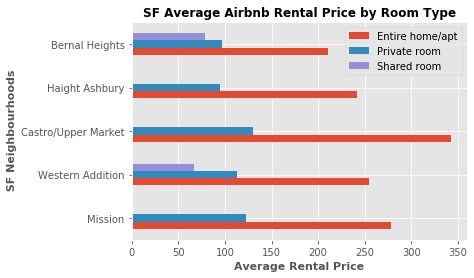

In [98]:
#where is the 5th city?

SF_top_neighbourhood_by_listings.plot(kind='barH')

plt.title("SF Average Airbnb Rental Price by Room Type",fontsize=12, fontweight='bold' )
plt.xlabel("Average Rental Price", fontsize=11, fontweight='bold')
plt.ylabel(" SF Neighbourhoods", fontsize=11, fontweight='bold')
#plt.legend(labels=five_SF_neighbourhoods_df, loc='upper right')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.6, i.get_y()+.45, \
            str(i.get_width()), fontsize=12,fontweight='bold',
color='dimgrey')

In [71]:
#SF Neighborhood By the Highest Airbnb Average Rental Price
SF_presidio_by_price = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="Presidio Heights"].mean()['price']
SF_presidio_by_price

SF_Marina_by_price = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="Marina"].mean()['price']
SF_Marina_by_price

SF_Diamond_by_price = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="Diamond Heights"].mean()['price']
SF_Diamond_by_price

SF_Castro_by_price = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="Castro/Upper Market"].mean()['price']

SF_lakeshore_by_price = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]== "South of Market"].mean()['price']
SF_lakeshore_by_price


278.4

In [72]:
SF_neighbourhood_by_highest_price = pd.DataFrame({"Average Rental Price":[385.86,370.33,310.00,278.40,268.78]},
                                                 index=["Presidio Heights","Marina","Diamond Heights",
                                                        "Castro/Upper Market","South of Market"])
SF_neighbourhood_by_highest_price



,Average Rental Price
Presidio Heights,385.86
Marina,370.33
Diamond Heights,310.00
Castro/Upper Market,278.40
South of Market,268.78


In [49]:
#SF_neighbourhood_by_high_price.fillna(0)

Text(0, 0.5, 'Average Rent Prices')

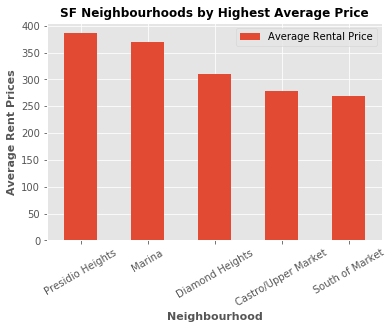

In [99]:
ax = SF_neighbourhood_by_highest_price.plot.bar(rot=30)

plt.title("SF Neighbourhoods by Highest Average Price",fontsize=12, fontweight='bold' )
plt.xlabel("Neighbourhood", fontsize=11, fontweight='bold')
plt.ylabel("Average Rent Prices", fontsize=11, fontweight='bold')


#plt.legend(labels=five_SF_neighbourhoods_df, loc='upper right')
#Add text labels, make chart green

In [40]:
SF_Soma_neighbourhood = SF_listing_df.loc[SF_listing_df["neighbourhood_cleansed"]=="South of Market"].groupby(['Room Type'])['price'].mean()
SF_Soma_neighbourhood

Room Type
Entire home/apt     254.390244
Private room        132.000000
Shared room        1283.000000
Name: price, dtype: float64